In [36]:
import os 
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

In [2]:
# Load and preprocess the data
def load_and_preprocess_data(data):
    images = []
    labels = []
    for label, image_paths in data.items():
        for path in image_paths:
            img = cv2.imread(str(path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
            img = cv2.resize(img, (224, 224))  # Resize image to VGG16 input size
            images.append(img)
            labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [3]:
# Load data
path = pathlib.Path(r"C:\Users\akshi\OneDrive\Desktop\gmu\ait 736\mid project\kvasir-dataset\kvasir-dataset")

In [4]:
dyed_ifted_polyps = list(path.glob('dyed-lifted-polyps/*'))
dyed_resection_margins = list(path.glob('dyed-resection-margins/*'))
esophagitis = list(path.glob('esophagitis/*'))
normal_cecum = list(path.glob('normal-cecum/*'))
normal_pylorus = list(path.glob('normal-pylorus/*'))
normal_z_line = list(path.glob('normal-z-line/*'))
polyps = list(path.glob('polyps/*'))
ulcerative_colitis = list(path.glob('ulcerative-colitis/*'))

In [5]:
data = {
    'dyed-lifted-polyps' : dyed_ifted_polyps ,
    'dyed-resection-margins' : dyed_resection_margins,
    'esophagitis' : esophagitis,
    'normal-cecum' : normal_cecum,
    'normal-pylorus' : normal_pylorus,
    'normal-z-line' : normal_z_line,
    'polyps' : polyps,
    'ulcerative-colitis' : ulcerative_colitis
}

polys_labels = {
    0:'dyed-lifted-polyps',
    1:'dyed-resection-margins',
    2:'esophagitis',
    3:'normal-cecum',
    4:'normal-pylorus',
    5:'normal-z-line',
    6:'polyps',
    7:'ulcerative-colitis'
}

In [6]:
images, labels = load_and_preprocess_data(data)

In [7]:
# Split the data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [13]:
train_data_res = resnet_preprocess_input(train_data)
val_data_res = resnet_preprocess_input(val_data)
test_data_res = resnet_preprocess_input(test_data)

In [14]:
# Convert string labels to numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [15]:
from keras.applications import ResNet50

In [16]:
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Create the model
model_res = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # Adjust the output units based on the number of classes
])

In [17]:
# Compile the model
model_res.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_res = model_res.fit(train_data_res, train_labels_encoded, epochs=10, batch_size=32, validation_data=(val_data_res, val_labels_encoded))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.5022 - loss: 19.6549 - val_accuracy: 0.7922 - val_loss: 0.5646
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7143 - loss: 0.8144 - val_accuracy: 0.7312 - val_loss: 0.4993
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.7554 - loss: 0.6237 - val_accuracy: 0.7766 - val_loss: 0.5205
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.7824 - loss: 0.5737 - val_accuracy: 0.8250 - val_loss: 0.4661
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7946 - loss: 0.4542 - val_accuracy: 0.8484 - val_loss: 0.3682
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8315 - loss: 0.4150 - val_accuracy: 0.8453 - val_loss: 0.3850
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8388 - loss: 0.4434 - val_accuracy: 0.8500 - val_loss: 0.4081
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8369 - loss: 0.4129 - val_accuracy: 0.8484 - 

In [18]:
# Evaluate the model
test_loss, test_acc = model_res.evaluate(test_data_res, test_labels_encoded)
print(f'Test Accuracy: {test_acc}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8275 - loss: 0.7113
Test Accuracy: 0.8187500238418579


In [38]:
# Define the number of classes
num_classes = 8  # Update with the number of classes in your dataset

# Define a function to create the ResNet50 model
def create_resnet_model():
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Perform cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_index, val_index) in enumerate(skf.split(train_data_res, train_labels_encoded)):
    print(f"Fold {fold + 1}/{num_folds}")
    
    # Create ResNet50 model
    model = create_resnet_model()
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(train_data_res[train_index], train_labels_encoded[train_index], epochs=10, batch_size=32, validation_data=(train_data_res[val_index], train_labels_encoded[val_index]), verbose=1)
    
    # Evaluate the model on validation data
    val_loss, val_acc = model.evaluate(train_data_res[val_index], train_labels_encoded[val_index], verbose=0)
    print(f"Validation Accuracy: {val_acc}")
    cv_scores.append(val_acc)

# Calculate and print the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")

Fold 1/5
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5093 - loss: 17.5845 - val_accuracy: 0.7637 - val_loss: 0.5740
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7138 - loss: 0.8942 - val_accuracy: 0.8125 - val_loss: 0.5466
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.7696 - loss: 0.6808 - val_accuracy: 0.8105 - val_loss: 0.7125
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7805 - loss: 0.6125 - val_accuracy: 0.8418 - val_loss: 0.4478
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8082 - loss: 0.4842 - val_accuracy: 0.8320 - val_loss: 0.4524
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8417 - loss: 0.4482 - val_accuracy: 0.8477 - val_loss: 0.4654
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.8555 - loss: 0.4257 - val_accuracy: 0.8301 - val_loss: 0.4277
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.8529 - loss: 0.4129 - val_accuracy: 

In [40]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data_res, test_labels_encoded)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8541 - loss: 0.5398
Test Loss: 0.5961833596229553
Test Accuracy: 0.8550000190734863


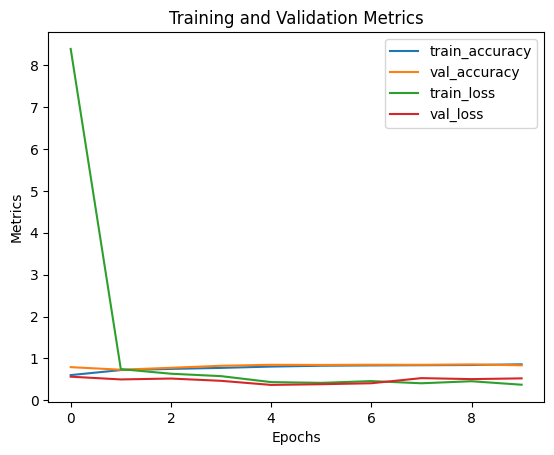

In [42]:
# Plotting learning curves
plt.plot(history_res.history['accuracy'], label='train_accuracy')
plt.plot(history_res.history['val_accuracy'], label='val_accuracy')
plt.plot(history_res.history['loss'], label='train_loss')
plt.plot(history_res.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


<Figure size 800x800 with 0 Axes>

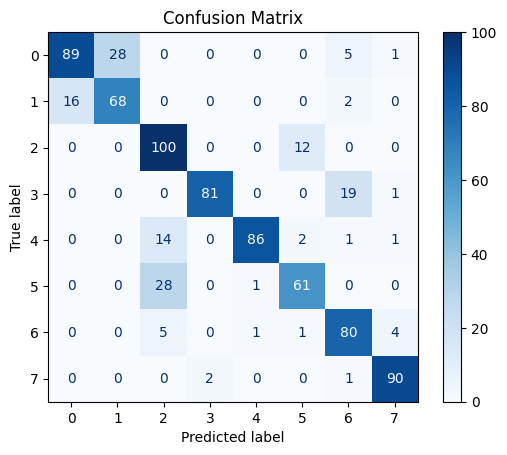

In [45]:
# Generate confusion matrix
predictions = model_res.predict(test_data_res)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels_encoded, predicted_labels)
classes = [str(i) for i in range(8)]  # Assuming you have 8 classes

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()